<a href="https://colab.research.google.com/github/Tristan-Brown1096/DS-Unit-2-Kaggle-Challenge/blob/master/module2-random-forests/LS_DS_222_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 2, Sprint 2, Module 2*

---

# Random Forests

## Assignment
- [ ] Read [“Adopting a Hypothesis-Driven Workflow”](http://archive.is/Nu3EI), a blog post by a Lambda DS student about the Tanzania Waterpumps challenge.
- [ ] Continue to participate in our Kaggle challenge.
- [ ] Define a function to wrangle train, validate, and test sets in the same way. Clean outliers and engineer features.
- [ ] Try Ordinal Encoding.
- [ ] Try a Random Forest Classifier.
- [ ] Submit your predictions to our Kaggle competition. (Go to our Kaggle InClass competition webpage. Use the blue **Submit Predictions** button to upload your CSV file. Or you can use the Kaggle API to submit your predictions.)
- [ ] Commit your notebook to your fork of the GitHub repo.

## Stretch Goals

### Doing
- [ ] Add your own stretch goal(s) !
- [ ] Do more exploratory data analysis, data cleaning, feature engineering, and feature selection.
- [ ] Try other [categorical encodings](https://contrib.scikit-learn.org/category_encoders/).
- [ ] Get and plot your feature importances.
- [ ] Make visualizations and share on Slack.

### Reading

Top recommendations in _**bold italic:**_

#### Decision Trees
- A Visual Introduction to Machine Learning, [Part 1: A Decision Tree](http://www.r2d3.us/visual-intro-to-machine-learning-part-1/),  and _**[Part 2: Bias and Variance](http://www.r2d3.us/visual-intro-to-machine-learning-part-2/)**_
- [Decision Trees: Advantages & Disadvantages](https://christophm.github.io/interpretable-ml-book/tree.html#advantages-2)
- [How a Russian mathematician constructed a decision tree — by hand — to solve a medical problem](http://fastml.com/how-a-russian-mathematician-constructed-a-decision-tree-by-hand-to-solve-a-medical-problem/)
- [How decision trees work](https://brohrer.github.io/how_decision_trees_work.html)
- [Let’s Write a Decision Tree Classifier from Scratch](https://www.youtube.com/watch?v=LDRbO9a6XPU)

#### Random Forests
- [_An Introduction to Statistical Learning_](http://www-bcf.usc.edu/~gareth/ISL/), Chapter 8: Tree-Based Methods
- [Coloring with Random Forests](http://structuringtheunstructured.blogspot.com/2017/11/coloring-with-random-forests.html)
- _**[Random Forests for Complete Beginners: The definitive guide to Random Forests and Decision Trees](https://victorzhou.com/blog/intro-to-random-forests/)**_

#### Categorical encoding for trees
- [Are categorical variables getting lost in your random forests?](https://roamanalytics.com/2016/10/28/are-categorical-variables-getting-lost-in-your-random-forests/)
- [Beyond One-Hot: An Exploration of Categorical Variables](http://www.willmcginnis.com/2015/11/29/beyond-one-hot-an-exploration-of-categorical-variables/)
- _**[Categorical Features and Encoding in Decision Trees](https://medium.com/data-design/visiting-categorical-features-and-encoding-in-decision-trees-53400fa65931)**_
- _**[Coursera — How to Win a Data Science Competition: Learn from Top Kagglers — Concept of mean encoding](https://www.coursera.org/lecture/competitive-data-science/concept-of-mean-encoding-b5Gxv)**_
- [Mean (likelihood) encodings: a comprehensive study](https://www.kaggle.com/vprokopev/mean-likelihood-encodings-a-comprehensive-study)
- [The Mechanics of Machine Learning, Chapter 6: Categorically Speaking](https://mlbook.explained.ai/catvars.html)

#### Imposter Syndrome
- [Effort Shock and Reward Shock (How The Karate Kid Ruined The Modern World)](http://www.tempobook.com/2014/07/09/effort-shock-and-reward-shock/)
- [How to manage impostor syndrome in data science](https://towardsdatascience.com/how-to-manage-impostor-syndrome-in-data-science-ad814809f068)
- ["I am not a real data scientist"](https://brohrer.github.io/imposter_syndrome.html)
- _**[Imposter Syndrome in Data Science](https://caitlinhudon.com/2018/01/19/imposter-syndrome-in-data-science/)**_


### More Categorical Encodings

**1.** The article **[Categorical Features and Encoding in Decision Trees](https://medium.com/data-design/visiting-categorical-features-and-encoding-in-decision-trees-53400fa65931)** mentions 4 encodings:

- **"Categorical Encoding":** This means using the raw categorical values as-is, not encoded. Scikit-learn doesn't support this, but some tree algorithm implementations do. For example, [Catboost](https://catboost.ai/), or R's [rpart](https://cran.r-project.org/web/packages/rpart/index.html) package.
- **Numeric Encoding:** Synonymous with Label Encoding, or "Ordinal" Encoding with random order. We can use [category_encoders.OrdinalEncoder](https://contrib.scikit-learn.org/category_encoders/ordinal.html).
- **One-Hot Encoding:** We can use [category_encoders.OneHotEncoder](https://contrib.scikit-learn.org/category_encoders/onehot.html).
- **Binary Encoding:** We can use [category_encoders.BinaryEncoder](https://contrib.scikit-learn.org/category_encoders/binary.html).


**2.** The short video 
**[Coursera — How to Win a Data Science Competition: Learn from Top Kagglers — Concept of mean encoding](https://www.coursera.org/lecture/competitive-data-science/concept-of-mean-encoding-b5Gxv)** introduces an interesting idea: use both X _and_ y to encode categoricals.

Category Encoders has multiple implementations of this general concept:

- [CatBoost Encoder](https://contrib.scikit-learn.org/category_encoders/catboost.html)
- [Generalized Linear Mixed Model Encoder](https://contrib.scikit-learn.org/category_encoders/glmm.html)
- [James-Stein Encoder](https://contrib.scikit-learn.org/category_encoders/jamesstein.html)
- [Leave One Out](https://contrib.scikit-learn.org/category_encoders/leaveoneout.html)
- [M-estimate](https://contrib.scikit-learn.org/category_encoders/mestimate.html)
- [Target Encoder](https://contrib.scikit-learn.org/category_encoders/targetencoder.html)
- [Weight of Evidence](https://contrib.scikit-learn.org/category_encoders/woe.html)

Category Encoder's mean encoding implementations work for regression problems or binary classification problems. 

For multi-class classification problems, you will need to temporarily reformulate it as binary classification. For example:

```python
encoder = ce.TargetEncoder(min_samples_leaf=..., smoothing=...) # Both parameters > 1 to avoid overfitting
X_train_encoded = encoder.fit_transform(X_train, y_train=='functional')
X_val_encoded = encoder.transform(X_train, y_val=='functional')
```

For this reason, mean encoding won't work well within pipelines for multi-class classification problems.

**3.** The **[dirty_cat](https://dirty-cat.github.io/stable/)** library has a Target Encoder implementation that works with multi-class classification.

```python
 dirty_cat.TargetEncoder(clf_type='multiclass-clf')
```
It also implements an interesting idea called ["Similarity Encoder" for dirty categories](https://www.slideshare.net/GaelVaroquaux/machine-learning-on-non-curated-data-154905090).

However, it seems like dirty_cat doesn't handle missing values or unknown categories as well as category_encoders does. And you may need to use it with one column at a time, instead of with your whole dataframe.

**4. [Embeddings](https://www.kaggle.com/colinmorris/embedding-layers)** can work well with sparse / high cardinality categoricals.

_**I hope it’s not too frustrating or confusing that there’s not one “canonical” way to encode categoricals. It’s an active area of research and experimentation — maybe you can make your own contributions!**_

### Setup

You can work locally (follow the [local setup instructions](https://lambdaschool.github.io/ds/unit2/local/)) or on Colab (run the code cell below).

In [1]:
%%capture
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Kaggle-Challenge/master/data/'
    !pip install category_encoders==2.*

# If you're working locally:
else:
    DATA_PATH = '../data/'

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split

train = pd.merge(pd.read_csv(DATA_PATH+'waterpumps/train_features.csv'), 
                 pd.read_csv(DATA_PATH+'waterpumps/train_labels.csv')).set_index('id')
test = pd.read_csv(DATA_PATH+'waterpumps/test_features.csv', index_col='id')
sample_submission = pd.read_csv(DATA_PATH+'waterpumps/sample_submission.csv')

train.shape, test.shape

((59400, 40), (14358, 39))

In [3]:
train.date_recorded = pd.to_datetime(train.date_recorded)
test.date_recorded = pd.to_datetime(test.date_recorded)

In [4]:
import numpy as np
train.construction_year = train.construction_year.replace(0, np.nan)
test.construction_year = test.construction_year.replace(0, np.nan)

In [5]:
train['years_between_inspection'] = train['date_recorded'].dt.year - train['construction_year']
test['years_between_inspection'] = test['date_recorded'].dt.year - test['construction_year']

In [6]:
def wrangle(X):
  #copy X
  X = X.copy()

  #replace weird latitude values
  X['latitude'] = X['latitude'].replace(-2e-08, 0)

  #replace lat/long 0 values with NaN
  cols_with_zeros = ['longitude', 'latitude']
  for col in cols_with_zeros:
    X[col] = X[col].replace(0, np.nan)

  #drop constant columns
  X = X.drop([col for col in X if X[col].nunique()==1], axis=1)

  #drop high cardinality columns
  hc = [col for col in X.describe(include='object').columns if X[col].nunique() > 100]
  X = X.drop(hc, axis=1)

  #drop repeated column
  X = X.drop(['quantity_group', 'date_recorded', 'construction_year'], axis=1)

  #return new version 
  return X

In [7]:
train = wrangle(train)
test = wrangle(test)

In [8]:
#train = train.astype({'region_code' : 'object',
#              'district_code' : 'object'})

#Split the data

In [9]:
y = train['status_group']

X_2 = train.drop(['status_group', 'scheme_management', 'permit', 'source', 'basin', 'management', 'permit', 'public_meeting'], axis=1)
X = train.drop('status_group', axis=1)

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state = 42)

#Baseline

In [11]:
baseline = y_train.value_counts(normalize=True).max()
print('Baseline Accuracy:', baseline)

Baseline Accuracy: 0.5429713804713805


#Build model_12

In [12]:
from category_encoders import OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier
from category_encoders import OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [13]:
model_12 = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(),
    RandomForestClassifier(random_state=42, n_estimators=300, max_features='sqrt')
)

model_12.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['basin', 'region', 'public_meeting',
                                      'scheme_management', 'permit',
                                      'extraction_type',
                                      'extraction_type_group',
                                      'extraction_type_class', 'management',
                                      'management_group', 'payment',
                                      'payment_type', 'water_quality',
                                      'quality_group', 'quantity', 'source',
                                      'source_type', 'source_class',
                                      'waterpoint_type...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='sqrt',
                                 

#Check metrics

In [14]:
print('Training accuracy', model_12.score(X_train, y_train))
print('Validation accuracy', model_12.score(X_val, y_val))

Training accuracy 0.9952861952861953
Validation accuracy 0.8015993265993266


#Test model_12

In [15]:
X_test_1 = test

In [16]:
y_pred_3 = model_12.predict(X_test_1)

In [17]:
y_pred_3 = pd.DataFrame(y_pred_3, columns=['status_group'], index=X_test_1.index)
y_pred_3.head()

,status_group
id,
50785,non functional
51630,functional
17168,functional
45559,non functional
49871,functional


In [18]:
y_pred_3.to_csv('tristan_brown_submit_3.csv')

In [19]:
from google.colab import files
files.download('tristan_brown_submit_3.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#Build model_13

In [20]:
model_13 = make_pipeline(
    OneHotEncoder(use_cat_names=True),
    SimpleImputer(),
    RandomForestClassifier(random_state=42, n_estimators=300, max_features='sqrt')
)

model_13.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('onehotencoder',
                 OneHotEncoder(cols=['basin', 'region', 'public_meeting',
                                     'scheme_management', 'permit',
                                     'extraction_type', 'extraction_type_group',
                                     'extraction_type_class', 'management',
                                     'management_group', 'payment',
                                     'payment_type', 'water_quality',
                                     'quality_group', 'quantity', 'source',
                                     'source_type', 'source_class',
                                     'waterpoint_type',...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='sqrt',
                                        max_leaf_nodes=None, max_samples=None,


In [21]:
print('Training accuracy', model_13.score(X_train, y_train))
print('Validation accuracy', model_13.score(X_val, y_val))

Training accuracy 0.9952861952861953
Validation accuracy 0.8


#Test model_13

In [22]:
y_pred_4 = model_13.predict(X_test_1)
y_pred_4 = pd.DataFrame(y_pred_4, columns=['status_group'], index=X_test_1.index)
y_pred_4.to_csv('tristan_brown_submit_4.csv')
files.download('tristan_brown_submit_4.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#Build model_14

In [23]:
X_2 = train.drop(['status_group', 'scheme_management', 'permit', 'source', 'basin', 'management', 'permit', 'public_meeting'], axis=1)

In [24]:
X_train_2, X_val_2, y_train_2, y_val_2 = train_test_split(X_2, y, test_size=0.2, random_state = 42)

In [25]:
baseline_2 = y_train.value_counts(normalize=True).max()
print('Baseline Accuracy:', baseline_2)

Baseline Accuracy: 0.5429713804713805


In [26]:
model_14 = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(),
    RandomForestClassifier(random_state=42, n_estimators=500, max_features='sqrt')
)

model_14.fit(X_train_2, y_train_2)

Pipeline(memory=None,
         steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['region', 'extraction_type',
                                      'extraction_type_group',
                                      'extraction_type_class',
                                      'management_group', 'payment',
                                      'payment_type', 'water_quality',
                                      'quality_group', 'quantity',
                                      'source_type', 'source_class',
                                      'waterpoint_type',
                                      'waterpoint_type_group'],
                                drop_invariant=False, handle_missing='value',
                                handl...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='sqrt',
         

In [27]:
print('Training accuracy', model_14.score(X_train_2, y_train_2))
print('Validation accuracy', model_14.score(X_val_2, y_val_2))

Training accuracy 0.9948442760942761
Validation accuracy 0.8015993265993266


#Test model_14

In [28]:
X_test_2 = test.drop(['scheme_management', 'permit', 'source', 'basin', 'management', 'permit', 'public_meeting'], axis=1)
y_pred_5 = model_14.predict(X_test_2)
y_pred_5 = pd.DataFrame(y_pred_5, columns=['status_group'], index=X_test_2.index)
y_pred_5.to_csv('tristan_brown_submit_5.csv')
files.download('tristan_brown_submit_5.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#Build model_15

In [29]:
model_15 = make_pipeline(
    OneHotEncoder(),
    SimpleImputer(),
    RandomForestClassifier(random_state=42, n_estimators=500, max_features='sqrt')
)

model_15.fit(X_train_2, y_train_2)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.77 µs


Pipeline(memory=None,
         steps=[('onehotencoder',
                 OneHotEncoder(cols=['region', 'extraction_type',
                                     'extraction_type_group',
                                     'extraction_type_class',
                                     'management_group', 'payment',
                                     'payment_type', 'water_quality',
                                     'quality_group', 'quantity', 'source_type',
                                     'source_class', 'waterpoint_type',
                                     'waterpoint_type_group'],
                               drop_invariant=False, handle_missing='value',
                               handle_...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='sqrt',
                                        max_leaf_nodes=N

In [30]:
print('Training accuracy', model_15.score(X_train_2, y_train_2))
print('Validation accuracy', model_15.score(X_val_2, y_val_2))

Training accuracy 0.9948442760942761
Validation accuracy 0.8009259259259259


#Build model_16

In [31]:
model_16 = make_pipeline(
    OneHotEncoder(use_cat_names=True),
    SimpleImputer(),
    RandomForestClassifier(random_state=42, n_estimators=500, max_features='sqrt', max_depth=18)
)

model_16.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('onehotencoder',
                 OneHotEncoder(cols=['basin', 'region', 'public_meeting',
                                     'scheme_management', 'permit',
                                     'extraction_type', 'extraction_type_group',
                                     'extraction_type_class', 'management',
                                     'management_group', 'payment',
                                     'payment_type', 'water_quality',
                                     'quality_group', 'quantity', 'source',
                                     'source_type', 'source_class',
                                     'waterpoint_type',...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=18, max_features='sqrt',
                                        max_leaf_nodes=None, max_samples=None,
  

In [32]:
print('Training accuracy', model_16.score(X_train, y_train))
print('Validation accuracy', model_16.score(X_val, y_val))

Training accuracy 0.8785774410774411
Validation accuracy 0.7994949494949495


#Build model_17

In [33]:
model_17 = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(),
    RandomForestClassifier(random_state=42, n_estimators=500, max_features='sqrt', max_depth=18)
)

model_17.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['basin', 'region', 'public_meeting',
                                      'scheme_management', 'permit',
                                      'extraction_type',
                                      'extraction_type_group',
                                      'extraction_type_class', 'management',
                                      'management_group', 'payment',
                                      'payment_type', 'water_quality',
                                      'quality_group', 'quantity', 'source',
                                      'source_type', 'source_class',
                                      'waterpoint_type...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=18, max_features='sqrt',
                                   

In [34]:
print('Training accuracy', model_17.score(X_train, y_train))
print('Validation accuracy', model_17.score(X_val, y_val))

Training accuracy 0.9191498316498317
Validation accuracy 0.807070707070707


#Test model_17

In [36]:
y_pred_6 = model_17.predict(X_test_1)
y_pred_6 = pd.DataFrame(y_pred_6, columns=['status_group'], index=X_test_1.index)
y_pred_6.to_csv('tristan_brown_submit_6.csv')
files.download('tristan_brown_submit_6.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#Build model_18

In [37]:
model_18 = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(),
    RandomForestClassifier(random_state=42, n_estimators=500, max_features='sqrt', max_depth=18)
)

model_18.fit(X_train_2, y_train_2)

Pipeline(memory=None,
         steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['region', 'extraction_type',
                                      'extraction_type_group',
                                      'extraction_type_class',
                                      'management_group', 'payment',
                                      'payment_type', 'water_quality',
                                      'quality_group', 'quantity',
                                      'source_type', 'source_class',
                                      'waterpoint_type',
                                      'waterpoint_type_group'],
                                drop_invariant=False, handle_missing='value',
                                handl...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=18, max_features='sqrt',
           

In [38]:
print('Training accuracy', model_18.score(X_train_2, y_train_2))
print('Validation accuracy', model_18.score(X_val_2, y_val_2))

Training accuracy 0.9206649831649831
Validation accuracy 0.806060606060606


#Build model_19

In [40]:
model_19 = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(),
    RandomForestClassifier(random_state=42, n_estimators=500, max_features='sqrt', max_depth=20)
)

model_19.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['basin', 'region', 'public_meeting',
                                      'scheme_management', 'permit',
                                      'extraction_type',
                                      'extraction_type_group',
                                      'extraction_type_class', 'management',
                                      'management_group', 'payment',
                                      'payment_type', 'water_quality',
                                      'quality_group', 'quantity', 'source',
                                      'source_type', 'source_class',
                                      'waterpoint_type...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=20, max_features='sqrt',
                                   

In [42]:
print('Training accuracy', model_19.score(X_train, y_train))
print('Validation accuracy', model_19.score(X_val, y_val))

Training accuracy 0.9466540404040404
Validation accuracy 0.8071548821548822


#model_19 feature importance

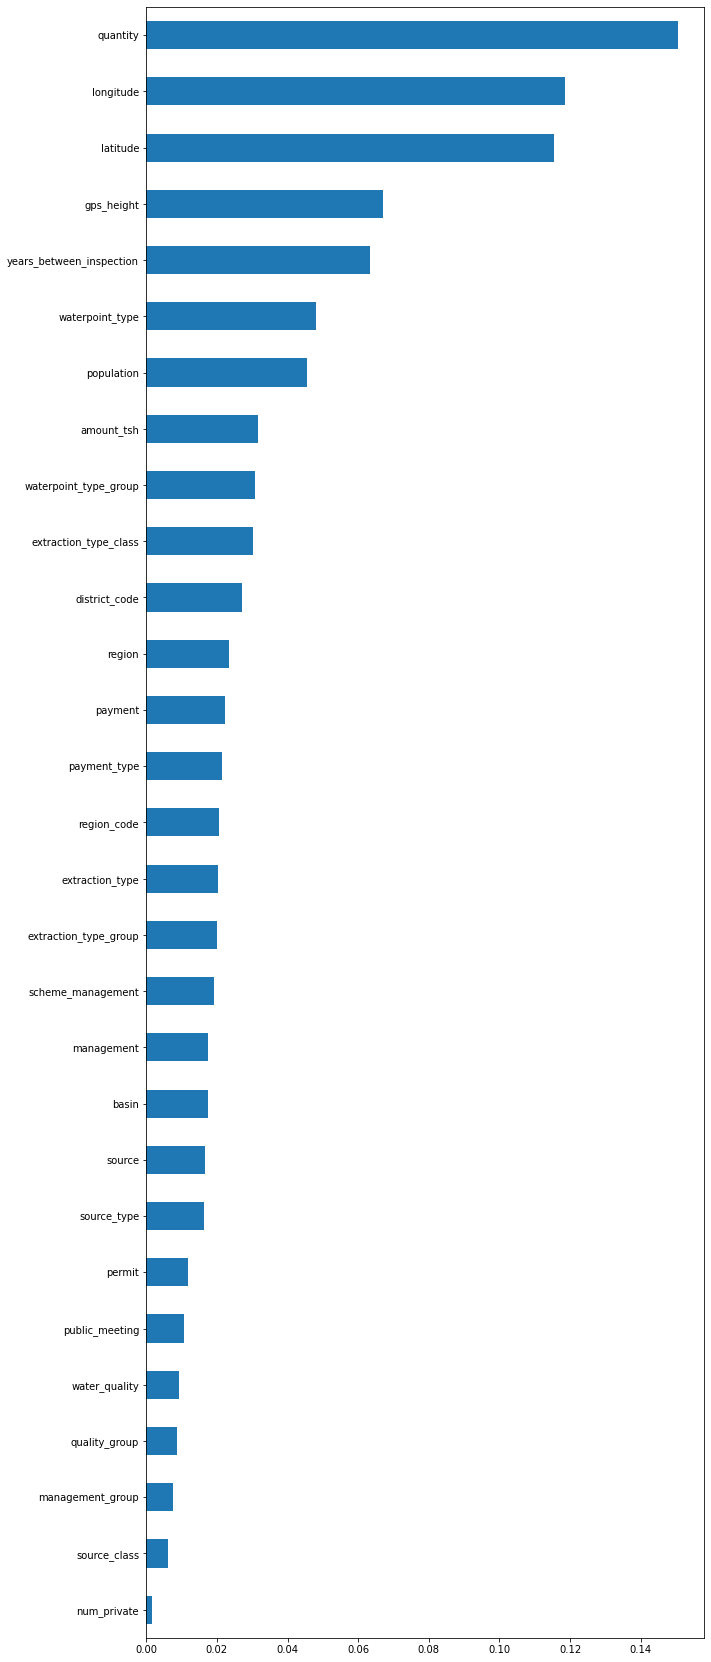

In [54]:
import matplotlib.pyplot as plt

classifier = model_19.named_steps['randomforestclassifier']
feature_names = model_19.named_steps['ordinalencoder'].feature_names

feat_importances = classifier.feature_importances_
importances = pd.Series(feat_importances, index=feature_names)

plt.figure(figsize=(10,30), facecolor='w')

importances.sort_values().plot(kind='barh')

#Test model_19

In [43]:
y_pred_7 = model_19.predict(X_test_1)
y_pred_7 = pd.DataFrame(y_pred_7, columns=['status_group'], index=X_test_1.index)
y_pred_7.to_csv('tristan_brown_submit_7.csv')
files.download('tristan_brown_submit_7.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#model_20

In [44]:
model_20 = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(),
    RandomForestClassifier(random_state=42, n_estimators=1000, max_features='sqrt', max_depth=20)
)

model_20.fit(X_train, y_train)

print('Training accuracy', model_20.score(X_train, y_train))
print('Validation accuracy', model_20.score(X_val, y_val))

Training accuracy 0.946590909090909
Validation accuracy 0.8085016835016835


#Test model_20

In [45]:
y_pred_8 = model_20.predict(X_test_1)
y_pred_8 = pd.DataFrame(y_pred_8, columns=['status_group'], index=X_test_1.index)
y_pred_8.to_csv('tristan_brown_submit_8.csv')
files.download('tristan_brown_submit_8.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>